<h1 style="text-align: center;">Housing Price Prediction</h1>


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle #Library for saving model

In [55]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*does not have valid feature names.*")


With dataset housing of USA, we do not use atribute address, beside that we use the others,
Mission: to reach the model of machine learning base on this dataset when user input Area Income, House Age, Number of Rooms, Number of Bedrooms, Area Population, Hence model will predict the prict of this house what is!<br>
<strong>Step:<strong>
1. Construct dataset and cleaning and normalize
2. Class Modelling for database
3. Evalueate and Improve Model
4. Filter and load data
5. Select Algorithm
6. Train Model
7. Save Model
8. Load Model
9. Intergrate and Invoke ML Model

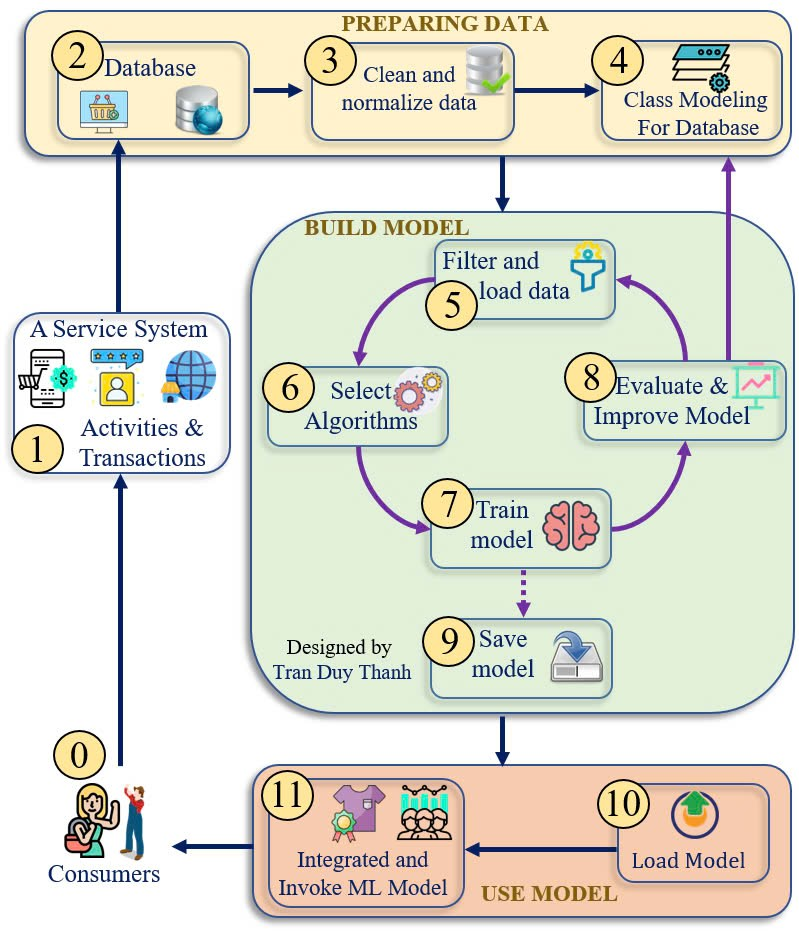

In [16]:
df = pd.read_csv("C:/Coding/Projects/DataProjects/MachineLearningProjects/HousePricePrediction/USA_Housing.csv")

In [18]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [22]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [24]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [45]:
X = df[df.columns[:5]]
y = df["Price"]

In [47]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [33]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Tạo mô hình Linear Regression
lm = LinearRegression()

# Huấn luyện mô hình với tập huấn luyện
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
print("Input 1:")
print([X_test.iloc[0]])

pre1 = lm.predict([X_test.iloc[0]])
print("Housing Price prediction 1 =", pre1)

Input 1:
[Avg. Area Income                66774.995817
Avg. Area House Age                 5.717143
Avg. Area Number of Rooms           7.795215
Avg. Area Number of Bedrooms        4.320000
Area Population                 36788.980327
Name: 1718, dtype: float64]
Housing Price prediction 1 = [1257919.72909702]


In [57]:
print("Input 2:")
input2=[66774.995817, 5.717143, 7.795215, 4.320000, 36788.980327]
pre2 = lm.predict([input2])
print("Housing Price prediction 2 =", pre2)

Input 2:
Housing Price prediction 2 = [1257919.7174458]


In [61]:
print("Input 3:")
input3=[21.566696, 165453.0425, 120499.8391, 1999.785336, 15.340604]
print(input3)
pre3 = lm.predict([input3])
print("Housing Price prediction 3 =", pre3)

Input 3:
[21.566696, 165453.0425, 120499.8391, 1999.785336, 15.340604]
Housing Price prediction 3 = [4.18962799e+10]


In [63]:
predictions = lm.predict(X_test)
print("Full Housing Price Predictions:")
print(predictions)

Full Housing Price Predictions:
[1257919.72909702  822112.41884159 1740669.05865521  972452.12917467
  993422.26329271  644126.0741441  1073911.79101603  856584.0019415
 1445318.25518378 1204342.19071247 1455792.4621292  1298556.65696466
 1735924.33836111 1336925.77577769 1387637.43231932 1222403.77772037
  613786.28691901  963933.54416242 1221197.33050126 1198071.575636
  505861.89531603 1769106.54723412 1853881.16842501 1200369.50507915
 1065129.12850722 1812033.73067373 1768686.4709129  1439920.8381432
 1387251.99649402 1541178.39224192  726418.80504192 1754497.60908682
 1462185.72653131 1025600.16081094 1284926.8685157   917454.59590892
 1187046.9495692   999330.91117485 1329536.63409617  782191.60441407
 1393272.03053871  578216.88394887  822643.37150989 1895533.11413248
 1672019.84892043  966926.45434595 1129674.55638151  792797.7591463
 1161057.18412157 1472396.71417132 1457656.70412264 1162939.33422891
 1099453.68110997 1358107.44619368  841103.70380511  986322.30573628
 112332

## Evaluate Model by Coefficient and Interpreter

In [66]:
# print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)%doctest_mode

-2640441.3997827456
                                Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604


In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300086714
MSE: 10100187858.869934
RMSE: 100499.6908396734


In [74]:
modelname = "housingmodel.zip"

pickle.dump(lm, open(modelname, 'wb'))